This file contains the machine Learning Model for the retrived Data i.e for Traning from the Data and then for Making predections

In [1]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as ptl 
import seaborn as sns

In [2]:
df = pd.read_csv("Data for _BTC_USD_.csv")
df.head(4)

,Date,Open,High,Low,Close,High_Last_7_Days,Days_Since_High_Last_7_Days,%_Diff_From_High_Last_7_Days,Low_Last_7_Days,Days_Since_Low_Last_7_Days,%_Diff_From_Low_Last_7_Days,High_Next_5_Days,%_Diff_From_High_Next_5_Days,Low_Next_5_Days,%_Diff_From_Low_Next_5_Days
0,2017-07-10 00:00:00,2511.43,2530.34,2271.79,2344.02,2530.34,0,-7.363437,2271.79,0,3.179431,2237.13,4.777997,1974.03,18.742876
1,2017-07-11 00:00:00,2344.02,2412.75,2265.48,2324.29,2530.34,1,-8.143174,2265.48,0,2.595918,2237.13,3.896063,1808.99,28.485508
2,2017-07-12 00:00:00,2324.29,2424.82,2262.08,2403.09,2530.34,2,-5.028968,2262.08,0,6.233643,2237.13,7.418433,1808.99,32.841530
3,2017-07-13 00:00:00,2403.09,2436.66,2334.96,2362.44,2530.34,3,-6.635472,2262.08,1,4.436625,2400.74,-1.595341,1808.99,30.594420


In [3]:
columns = [
        'Days_Since_High_Last_7_Days',
        '%_Diff_From_High_Last_7_Days',
        'Days_Since_Low_Last_7_Days',
        '%_Diff_From_Low_Last_7_Days'
    ]

In [4]:
# choosing the features to to taken as input and output 
X = df[columns].copy()
y_high  = df['%_Diff_From_High_Next_5_Days']
y_low = df['%_Diff_From_Low_Next_5_Days']


In [5]:
X.describe()

,Days_Since_High_Last_7_Days,%_Diff_From_High_Last_7_Days,Days_Since_Low_Last_7_Days,%_Diff_From_Low_Last_7_Days
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,3.040980,-6.668075,3.399800,9.866963
std,2.314372,6.142757,2.282779,9.020992
min,0.000000,-46.703998,0.000000,0.029267
25%,1.000000,-9.187187,1.000000,3.371009
50%,3.000000,-4.897227,4.000000,6.834301
75%,5.000000,-2.216898,6.000000,13.717720
max,6.000000,-0.000030,6.000000,78.860367


---> Exploratory Data Analysis and Feature Engg. <--- 

<Axes: >

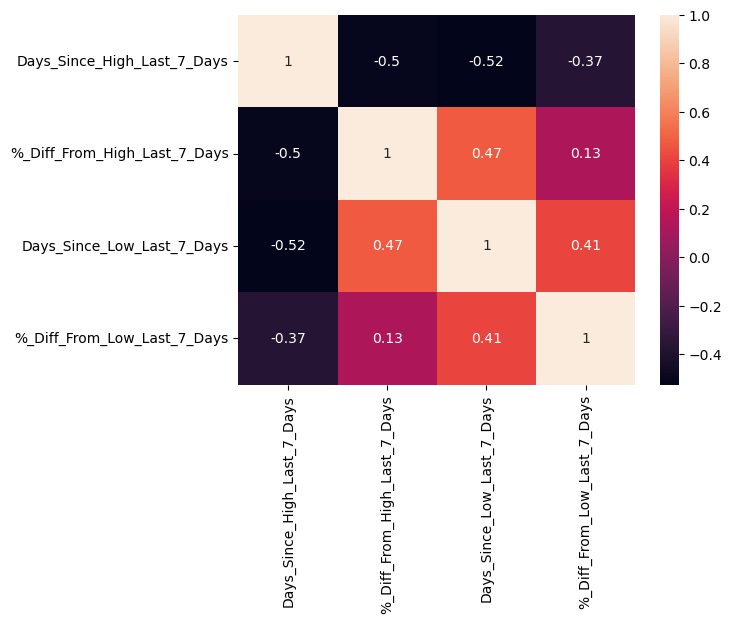

In [6]:
# checing the co-relation between in X for multi-colinearity 
sns.heatmap(X.corr(),annot=True)

we can see That there is not much Relation between the Features so each of them are equally imnportant 

In [7]:
# checking the missing values in X , Y_high and y_low respectively 
print(X.isna().sum() )


Days_Since_High_Last_7_Days     0
%_Diff_From_High_Last_7_Days    0
Days_Since_Low_Last_7_Days      0
%_Diff_From_Low_Last_7_Days     0
dtype: int64


In [8]:
print(y_high.isna().sum())
print(y_low.isna().sum())
# there is one missing value in each of the Y_high and y_low dataset --> imputing the Values 

1
1


In [9]:
y_high.describe()


count    2000.000000
mean       -6.092427
std         5.612833
min       -35.348291
25%        -8.562089
50%        -4.475406
75%        -1.926886
max         7.418433
Name: %_Diff_From_High_Next_5_Days, dtype: float64

In [10]:
y_low.describe()

count    2000.000000
mean        7.693375
std         9.872929
min         0.000000
25%         1.919026
50%         4.665003
75%         9.508814
max       104.047436
Name: %_Diff_From_Low_Next_5_Days, dtype: float64

In Both the cases we Can see that the 50 percentile and Mean are closer to each other showing that the data is somewhat nomrally or symetrtically Distributed so we can impute this using the mean value of the samne

In [11]:
# imputing the values 
y_high.fillna(y_high.mean() , inplace= True)
y_low.fillna(y_low.mean(),inplace= True )

In [12]:
# rechecking for the null Values
print(y_high.isna().sum())
print(y_low.isna().sum())

0
0


In [13]:
# Now spliting the Data into Traning and Testing split
from sklearn.model_selection import train_test_split 
x_train , x_test , y_high_train , y_high_test , y_low_train ,y_low_test = train_test_split(X , y_high , y_low , test_size= 0.3 , random_state=42)

# Standardizing the Given X_trian and X_test Data for better Result 

In [14]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train= sc.fit_transform(x_train)
x_test = sc.transform(x_test)




In [15]:
x_test


array([[-0.85988025, -0.51871526,  0.67444428, -0.9038248 ],
       [ 1.30139865, -1.02682355,  0.2346576 , -0.91136665],
       [-0.42762447, -0.12516352,  0.67444428,  0.34974914],
       ...,
       [ 0.86914287,  0.70666189, -0.64491574, -0.53389148],
       [ 0.43688709,  0.37644278,  0.67444428, -0.471793  ],
       [ 1.30139865,  0.70661619, -1.52448909, -0.90438367]])

In [16]:
x_train

array([[ 0.00463131,  0.74703094,  1.11423095, -0.91339115],
       [ 0.43688709,  0.63836391,  0.67444428, -0.71198235],
       [-1.29213603,  0.8976127 ,  1.11423095,  1.85699085],
       ...,
       [ 1.30139865,  0.0481564 , -0.64491574, -0.92087344],
       [ 0.43688709, -0.32793234, -1.52448909, -0.82083974],
       [-0.42762447,  0.7687635 ,  1.11423095, -0.34942601]])

In [17]:
x_test 

array([[-0.85988025, -0.51871526,  0.67444428, -0.9038248 ],
       [ 1.30139865, -1.02682355,  0.2346576 , -0.91136665],
       [-0.42762447, -0.12516352,  0.67444428,  0.34974914],
       ...,
       [ 0.86914287,  0.70666189, -0.64491574, -0.53389148],
       [ 0.43688709,  0.37644278,  0.67444428, -0.471793  ],
       [ 1.30139865,  0.70661619, -1.52448909, -0.90438367]])

In [18]:
y_low_test

1394     0.500539
353      6.020737
1334     3.559094
906      1.207389
1290    23.194678
          ...    
1555     3.189577
998      1.088734
832     12.420700
817      4.801047
1100     2.512966
Name: %_Diff_From_Low_Next_5_Days, Length: 601, dtype: float64

In [19]:
y_high_test

1394   -10.546777
353    -12.023747
1334   -15.020439
906    -15.244755
1290    -0.331896
          ...    
1555   -10.938277
998     -9.632550
832     -6.108939
817     -6.037095
1100    -0.177944
Name: %_Diff_From_High_Next_5_Days, Length: 601, dtype: float64

In [20]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix , precision_score, roc_auc_score , f1_score , recall_score

In [21]:
# importing the models 
from sklearn.linear_model import LinearRegression,  ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

models_list = {
    'Linear Regression ' : LinearRegression(),
    'Elastic Net' : ElasticNet(),
    'Decison-Tree_Regressor': DecisionTreeRegressor(),
    'Random-Forest-Regressor' : RandomForestRegressor(),
    'Gradient-Boosting-Regressor' : GradientBoostingRegressor(),
    'AdaBooost-Regressor' : AdaBoostRegressor(),
    'K-Nearest-Neighbours' : KNeighborsRegressor()
}

In [22]:
# Function for Traning the Model 
       


In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function for Training the Model and Selecting the Best 2 Models
def train_model(models):
    results = {}
    model_performance = []

    for i, (model_name, model) in enumerate(models.items()):
        print(f"\n{'='*40}\nTraining and Evaluation for Model: {model_name}\n{'='*40}")

        # Train models on the "high" target
        model_high = model
        model_high.fit(x_train, y_high_train)
        
        # Train models on the "low" target
        model_low = model
        model_low.fit(x_train, y_low_train)

        # Making predictions on the trained model
        y_preds_high_train = model_high.predict(x_train)
        y_preds_high_test = model_high.predict(x_test)

        y_preds_low_train = model_low.predict(x_train)
        y_preds_low_test = model_low.predict(x_test)

        # Store and print results for the "high" target variable
        high_test_r2 = r2_score(y_high_test, y_preds_high_test)
        low_test_r2 = r2_score(y_low_test, y_preds_low_test)

        results[model_name] = {
            "high_train_mse": mean_squared_error(y_high_train, y_preds_high_train),
            "high_train_mae": mean_absolute_error(y_high_train, y_preds_high_train),
            "high_train_r2_score": r2_score(y_high_train, y_preds_high_train),

            "low_train_mse": mean_squared_error(y_low_train, y_preds_low_train),
            "low_train_mae": mean_absolute_error(y_low_train, y_preds_low_train),
            "low_train_r2_score": r2_score(y_low_train, y_preds_low_train),

            "high_test_mse": mean_squared_error(y_high_test, y_preds_high_test),
            "high_test_mae": mean_absolute_error(y_high_test, y_preds_high_test),
            "high_test_r2_score": high_test_r2,

            "low_test_mse": mean_squared_error(y_low_test, y_preds_low_test),
            "low_test_mae": mean_absolute_error(y_low_test, y_preds_low_test),
            "low_test_r2_score": low_test_r2,
        }

        # Display results in a structured and visible format
        print("\nResults for 'high' target variable:")
        print(f"  Training MSE: {results[model_name]['high_train_mse']:.4f}")
        print(f"  Training MAE: {results[model_name]['high_train_mae']:.4f}")
        print(f"  Training R2 Score: {results[model_name]['high_train_r2_score']:.4f}")
        print(f"  Test MSE: {results[model_name]['high_test_mse']:.4f}")
        print(f"  Test MAE: {results[model_name]['high_test_mae']:.4f}")
        print(f"  Test R2 Score: {results[model_name]['high_test_r2_score']:.4f}")

        print("\nResults for 'low' target variable:")
        print(f"  Training MSE: {results[model_name]['low_train_mse']:.4f}")
        print(f"  Training MAE: {results[model_name]['low_train_mae']:.4f}")
        print(f"  Training R2 Score: {results[model_name]['low_train_r2_score']:.4f}")
        print(f"  Test MSE: {results[model_name]['low_test_mse']:.4f}")
        print(f"  Test MAE: {results[model_name]['low_test_mae']:.4f}")
        print(f"  Test R2 Score: {results[model_name]['low_test_r2_score']:.4f}")
        
        print(f"{'='*40}\n")

        # Calculate the average test R² score for ranking models
        avg_test_r2 = (high_test_r2 + low_test_r2) / 2
        model_performance.append((model_name, avg_test_r2))

    # Sort models by average test R² score and select the top 2
    model_performance.sort(key=lambda x: x[1], reverse=True)
    top_2_models = model_performance[:2]

    print("\nTop 2 Best Performing Models based on Average Test R² Score:")
    for rank, (model_name, avg_r2) in enumerate(top_2_models, start=1):
        print(f"{rank}. Model: {model_name}, Average Test R² Score: {avg_r2:.4f}")

    return results, top_2_models




In [24]:
# calling the Function to Train the models and choose the best model 
train_model(models= models_list)


Training and Evaluation for Model: Linear Regression 

Results for 'high' target variable:
  Training MSE: 236.8382
  Training MAE: 13.8333
  Training R2 Score: -6.4931
  Test MSE: 241.9087
  Test MAE: 13.9855
  Test R2 Score: -6.7653

Results for 'low' target variable:
  Training MSE: 87.0886
  Training MAE: 5.8840
  Training R2 Score: 0.0731
  Test MSE: 97.2396
  Test MAE: 6.1001
  Test R2 Score: 0.0767


Training and Evaluation for Model: Elastic Net

Results for 'high' target variable:
  Training MSE: 227.2200
  Training MAE: 13.8333
  Training R2 Score: -6.1888
  Test MSE: 230.9129
  Test MAE: 13.9625
  Test R2 Score: -6.4124

Results for 'low' target variable:
  Training MSE: 89.5771
  Training MAE: 6.0149
  Training R2 Score: 0.0466
  Test MSE: 100.4427
  Test MAE: 6.2174
  Test R2 Score: 0.0463


Training and Evaluation for Model: Decison-Tree_Regressor

Results for 'high' target variable:
  Training MSE: 281.9367
  Training MAE: 13.8333
  Training R2 Score: -7.9199
  Test MSE

({'Linear Regression ': {'high_train_mse': 236.83821823376618,
   'high_train_mae': 13.833313059007331,
   'high_train_r2_score': -6.493053751878747,
   'low_train_mse': 87.0886292092442,
   'low_train_mae': 5.884040143372858,
   'low_train_r2_score': 0.0730538285964708,
   'high_test_mse': 241.90872045049474,
   'high_test_mae': 13.985510848584799,
   'high_test_r2_score': -6.765317635598274,
   'low_test_mse': 97.23964199869849,
   'low_test_mae': 6.100057529668014,
   'low_test_r2_score': 0.07668097668075546},
  'Elastic Net': {'high_train_mse': 227.2200110830666,
   'high_train_mae': 13.833313059007331,
   'high_train_r2_score': -6.18875428655444,
   'low_train_mse': 89.57707681739123,
   'low_train_mae': 6.014942225301173,
   'low_train_r2_score': 0.046567512253518184,
   'high_test_mse': 230.9129168600709,
   'high_test_mae': 13.962461067749537,
   'high_test_r2_score': -6.41235017175785,
   'low_test_mse': 100.44268908240223,
   'low_test_mae': 6.21737769944136,
   'low_test_r2_

Top 2 Best Performing Models based on Average Test R² Score:
1. Model: Decison-Tree_Regressor, Average Test R² Score: -3.5530
2. Model: Random-Forest-Regressor, Average Test R² Score: -6.9392


So now we will be HyperTuning the best  model to improve it's accuracy and score and then save the model to use it for further predections 

In [25]:
# HyperParameter Tuning the best model  Model 
model_high = DecisionTreeRegressor()
model_low  = DecisionTreeRegressor()

param_grid = {
    'criterion': ['squared_error', 'absolute_error', 'friedman_mse'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'auto', 'sqrt', 'log2', 0.5, 0.75],
    'max_leaf_nodes': [None, 10, 20, 30],
    'min_weight_fraction_leaf': [0.0, 0.1],
    'random_state': [42]  # Example random state for reproducibility
}




In [26]:
from sklearn.model_selection import RandomizedSearchCV
random1 = RandomizedSearchCV(estimator=DecisionTreeRegressor() , param_distributions= param_grid , n_iter= 100 , n_jobs= 2 ,verbose=2 , random_state=42 )
random2 = RandomizedSearchCV(estimator=DecisionTreeRegressor() , param_distributions=param_grid , n_iter =100 , n_jobs = 2 , verbose=2 ,random_state=42 )

In [27]:
random1.fit(x_train , y_high_train)
random2.fit(x_train , y_low_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
70 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\ProgramData\anaconda3\Lib\site-packages

Fitting 5 folds for each of 100 candidates, totalling 500 fits


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
70 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\ProgramData\anaconda3\Lib\site-packages

RandomizedSearchCV(estimator=DecisionTreeRegressor(), n_iter=100, n_jobs=2,
                   param_distributions={'criterion': ['squared_error',
                                                      'absolute_error',
                                                      'friedman_mse'],
                                        'max_depth': [None, 5, 10, 15, 20],
                                        'max_features': [None, 'auto', 'sqrt',
                                                         'log2', 0.5, 0.75],
                                        'max_leaf_nodes': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'min_weight_fraction_leaf': [0.0, 0.1],
                                        'random_state': [42]},
                   random_state=42, verbose=2)

In [28]:
random1.best_params_ # checking the best params for the high Estimator 


{'random_state': 42,
 'min_weight_fraction_leaf': 0.1,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_leaf_nodes': None,
 'max_features': 0.75,
 'max_depth': 10,
 'criterion': 'friedman_mse'}

In [29]:
random2.best_params_ # checking the best params for the Low Estimator 

{'random_state': 42,
 'min_weight_fraction_leaf': 0.1,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_leaf_nodes': 20,
 'max_features': None,
 'max_depth': 5,
 'criterion': 'squared_error'}

We can see that the Best params for both of the High model and the Model is the same 

In [30]:
model_high = DecisionTreeRegressor(min_samples_leaf=1 , min_weight_fraction_leaf= 0.1 , min_samples_split= 2 , max_leaf_nodes= 20 , max_features=None , max_depth= 5 ,criterion='squared_error', random_state=42 )
model_low = DecisionTreeRegressor(min_weight_fraction_leaf=0.1 , min_samples_split= 2 , min_samples_leaf= 1 , max_leaf_nodes= 20 , max_features= None , max_depth= 5 , criterion='squared_error',random_state=42)

In [31]:
model_high.fit(x_train , y_high_train )


DecisionTreeRegressor(max_depth=5, max_leaf_nodes=20,
                      min_weight_fraction_leaf=0.1, random_state=42)

In [32]:
model_low.fit(x_train , y_low_train)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=20,
                      min_weight_fraction_leaf=0.1, random_state=42)

In [33]:
# Checking the Scores again 
y_high_preds = model_high.predict(x_test)
y_low_preds = model_low.predict(x_test)


In [34]:
# Cheking the Performance 


high_test_mse=  mean_squared_error(y_high_test, y_high_preds),
high_test_mae=  mean_absolute_error(y_high_test, y_high_preds),
high_test_r2_score=  r2_score(y_high_test , y_high_preds)

low_test_mse=  mean_squared_error(y_low_test, y_low_preds),
low_test_mae=  mean_absolute_error(y_low_test, y_low_preds),
low_test_r2_score = r2_score(y_low_test , y_high_preds)


In [35]:
print('The Mean Squared Error for the High Predection is ' , high_test_mse)
print('The Mean Absolute Error for the High Predioction is ' , high_test_mae)
print('The r2 Score for the high predections is ' , high_test_r2_score)
print('--------------------------------------------------------------')
print('The Mean Squared Error for the Low perdiction is ' , low_test_mae)
print('The Mean Absolute Error for the Low Predection is ' , low_test_mae)
print('The r2 Score for the Low Predection is ' , low_test_r2_score)

The Mean Squared Error for the High Predection is  (29.46197223009428,)
The Mean Absolute Error for the High Predioction is  (4.115676415738698,)
The r2 Score for the high predections is  0.05426488093604476
--------------------------------------------------------------
The Mean Squared Error for the Low perdiction is  (6.1397761178266865,)
The Mean Absolute Error for the Low Predection is  (6.1397761178266865,)
The r2 Score for the Low Predection is  -1.8487668889060518


Saving and loading the Model 

In [36]:
import pickle

# Save `model_high` to a file
with open('model_high.pkl', 'wb') as file:
    pickle.dump(model_high, file)

# Save `model_low` to a file
with open('model_low.pkl', 'wb') as file:
    pickle.dump(model_low, file)

print("Models saved successfully with pickle.")


Models saved successfully with pickle.


In [37]:
# Load `model_high` from the file
with open('model_high.pkl', 'rb') as file:
    model_high = pickle.load(file)

# Load `model_low` from the file
with open('model_low.pkl', 'rb') as file:
    model_low = pickle.load(file)

print("Models loaded successfully with pickle.")

Models loaded successfully with pickle.


In [38]:
def predict_outcome(input ,  model_high = model_high, model_low = model_low):
    """
    Predicts outcomes using two models based on respective inputs.
    
    Parameters:
        input_high (array-like): Input data for the `high` model.
        input_low (array-like): Input data for the `low` model.
        model_high (sklearn estimator): Trained model for `high` target.
        model_low (sklearn estimator): Trained model for `low` target.
        
    Returns:
        dict: Dictionary with predictions from both models.
    """
    # Make predictions with each model
    pred_high = model_high.predict(input)
    pred_low = model_low.predict(input)

      # Format predictions for better presentation
    result = "Predictions: "
    result += f"High Prediction: {pred_high}"
    result += f"Low Prediction: {pred_low}"

    return result



In [39]:
# Using the model to Preditct score 
input  = [[2, -5.028968439024 , 0 , 6.23364337247136]]
predict_outcome(input)



'Predictions: High Prediction: [-9.30151619]Low Prediction: [12.60461274]'